In [2]:
# Import libraries
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow_datasets as tfds

In [3]:
# Get data images from 
(ds_train, ds_test), ds_info = tfds.load("mnist", split=["train","test"],shuffle_files=True, as_supervised=True, with_info=True)

# Convert to NumPy arrays
x_train = []
y_train = []

for image, label in tfds.as_numpy(ds_train):
    x_train.append(image)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = []
y_test = []

for image, label in tfds.as_numpy(ds_test):
    x_test.append(image)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)


2025-05-07 15:52:59.952307: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-05-07 15:52:59.952328: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-07 15:52:59.952333: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-07 15:52:59.952348: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-07 15:52:59.952357: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-05-07 15:53:03.378088: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-05-07 15:53:03.971774: W ten

<Axes: ylabel='count'>

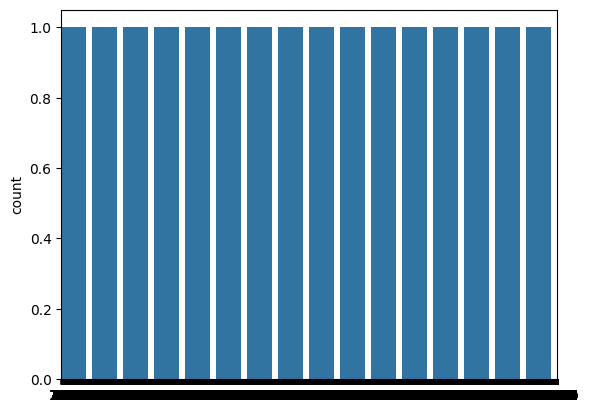

In [6]:
# Plot y train count
sns.countplot(y_train)

In [4]:
# Check for NaN values in training set
np.isnan(x_train).any()

False

In [5]:
# Check for NaN values in test set
np.isnan(x_test).any()

False

In [6]:
# Store all pictures in single tensor:
input_shape = (28,28,1)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], x_train.shape[2],1)
x_train = x_train/255.0
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], x_test.shape[2],1)
x_test = x_test/255.0

In [7]:
# Label encoding: Converting labels to binary values using one_hot function
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test  = tf.one_hot(y_test.astype(np.int32), depth=10)

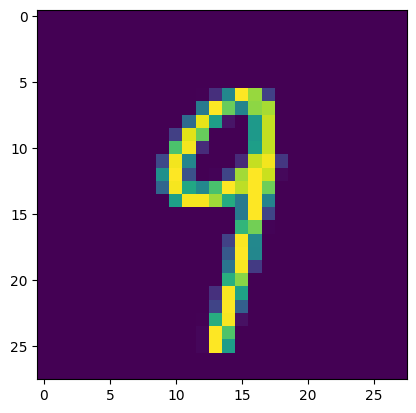

In [8]:
plt.imshow(x_train[400][:,:,0])

In [9]:
# Define model: Start with defining batch size, num_classes and epochs. 
# Num_classes because we are going from 0 to 9 in terms of digit identification
batch_size = 64
num_classes = 10
epochs = 5

In [10]:
# Define model: 
#    Conv2D: Convolutional layers: Each filter (32 in the first 2 conv layers and 64 in the 
#    next two conv layers) transforms a part of the image (5x5 for the first two conv layeyers
#    And 3x3 the for next two convD layers)
#    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same',activation='relu',input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same',activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='linear')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

/Users/davf/tensorflow-arm/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Train model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs)

Epoch 1/5


2025-05-07 15:53:27.391688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - categorical_accuracy: 0.7780 - loss: 1.0795
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - categorical_accuracy: 0.9559 - loss: 0.3588
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - categorical_accuracy: 0.9648 - loss: 0.3317
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - categorical_accuracy: 0.9694 - loss: 0.3085
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - categorical_accuracy: 0.9699 - loss: 0.4226


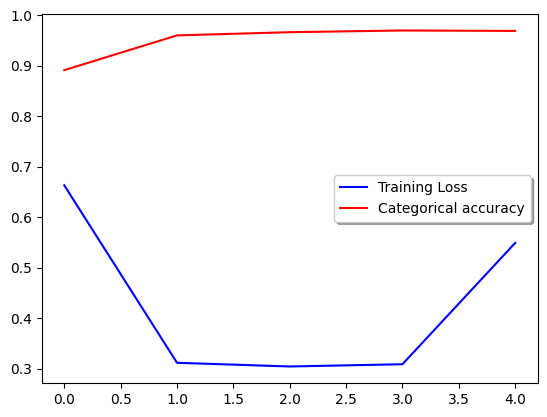

In [13]:
# Loss and accuracy curves
cat_acc = history.history['categorical_accuracy']

fig, ax = plt.subplots(1,1)
ax.plot(history.history['loss'], color='b', label="Training Loss")
ax.plot(cat_acc, color='r', label="Categorical accuracy")
legend = ax.legend(loc='best', shadow=True)

In [14]:
# Predict results
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - categorical_accuracy: 0.9918 - loss: 0.1141


In [16]:
# Confusion matrix:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Axes: >

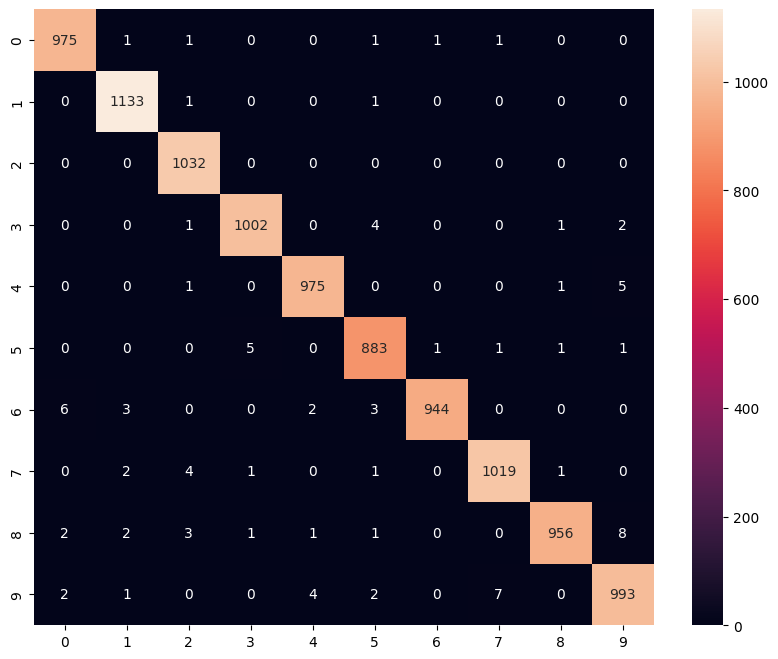

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')